### Introduction

An organization wants to predict who possible defaulters are for the consumer loans product. They have data about historic customer behavior based on what they have observed. Hence when they acquire new customers they want to predict who is riskier and who is not.

#### Task Details
An organization wants to predict who possible defaulters are for the consumer loans product. They have data about historic customer behavior based on what they have observed. Hence when they acquire new customers they want to predict who is riskier and who is not.

#### What do you have to do?
You are required to use the training dataset to identify patterns that predict “potential” defaulters.

#### Expected Submission
Submissions should be made in the same format as the Sample Notebook provided. Train/Test split should be 80% for training & 20% for testing.

#### Evaluation
Submissions will be evaluated on the basis of roc_auc_score on 20% of train_dataset.

#### NOTE
The test_dataset was just a part of the Hackathon, the notebook you will be submitting should only train & test on train_data and predict a higher score.
#### About Data
- ID: Id of the user(All Unique)
- Income: Income of the user
- Age: Age of the user
- Experience: Professional experience of the user in years
- Profession: Profession of the user
- Married/Single: Whether married or not
- House_Ownership: Owned or rented or neither
- Car_Ownership: Does the person own a car
- STATE: State of residence
- CITY: City of residence
- CURRENT_JOB_YRS: Years of experience in the current job
- CURRENT_HOUSE_YRS: Number of years in the current residence\
- Risk_Flag: Defaulted on a loan(Target variable)

#### Importing necessary library and set options

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from scipy.stats import chi2_contingency
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
%matplotlib inline
sns.set_theme(color_codes=True, style='darkgrid', 
              palette='deep', font='sans-serif')

## Importing Data and Data Cleansing

In [2]:
df = pd.read_csv("../input/loan-prediction-based-on-customer-behavior/Training Data.csv")
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


Exploring the data data type of each columns

In [3]:
df.CITY.value_counts()

Vijayanagaram       1259
Bhopal              1208
Bulandshahr         1185
Saharsa[29]         1180
Vijayawada          1172
                    ... 
Ujjain               486
Warangal[11][12]     459
Bettiah[33]          457
Katni                448
Karaikudi            431
Name: CITY, Length: 317, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [5]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


Checking for null values

In [6]:
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

There are no missing value in the datasets!

### Data Visualization 

### Distribution of Age

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


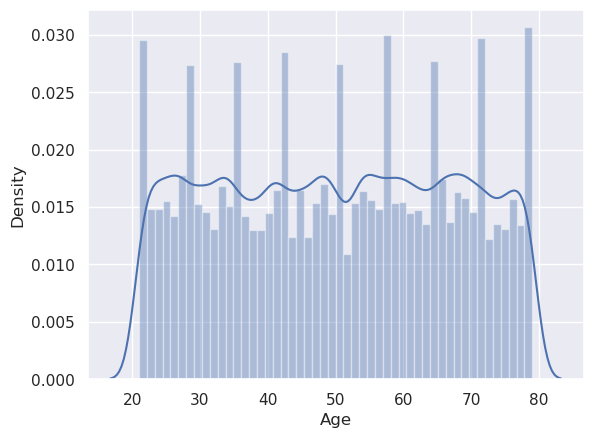

In [7]:
sns.distplot(a=df["Age"]);

### Effect of House ownership on Risk Flag

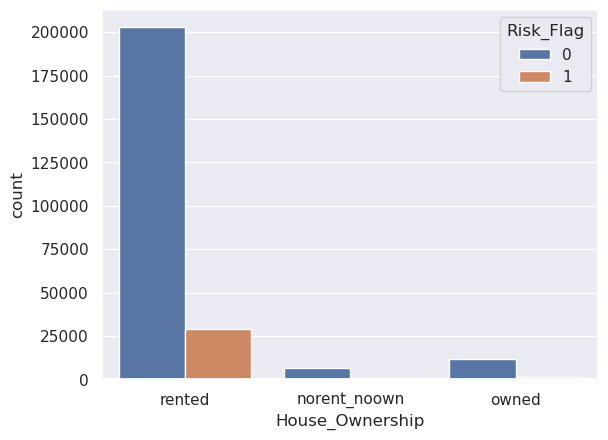

In [8]:
sns.countplot(x='House_Ownership', hue='Risk_Flag', data=df);

### Effect of Car owners on Risk Flag

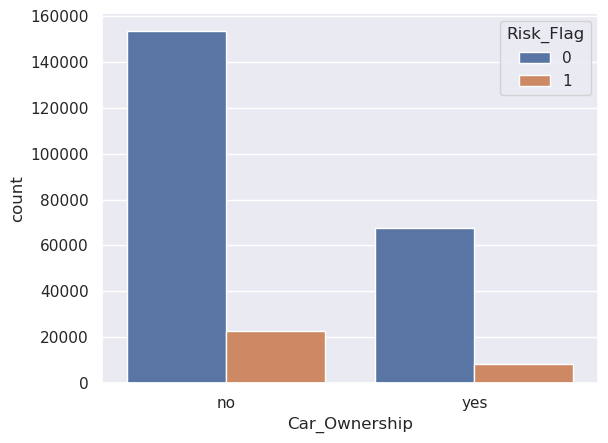

In [9]:
sns.countplot(x='Car_Ownership', hue='Risk_Flag', data=df);

### Effect of Marital Status on Risk Flag

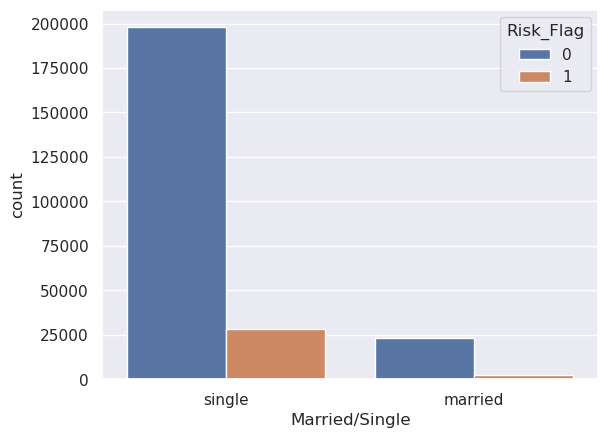

In [10]:
sns.countplot(x='Married/Single', hue='Risk_Flag', data=df);

### Distribution of Income

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


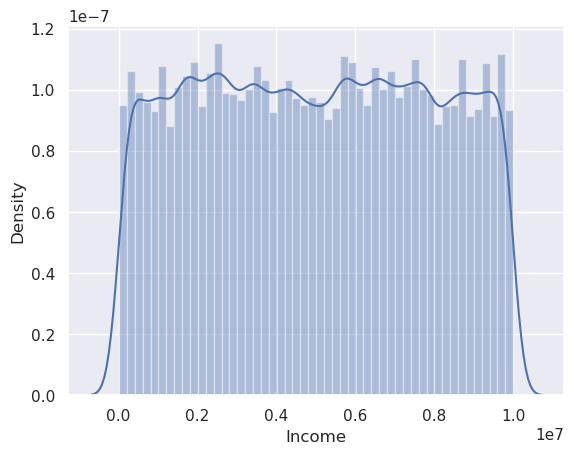

In [11]:
sns.distplot(a=df["Income"]);

### Relationship of Numerical variable on target variable

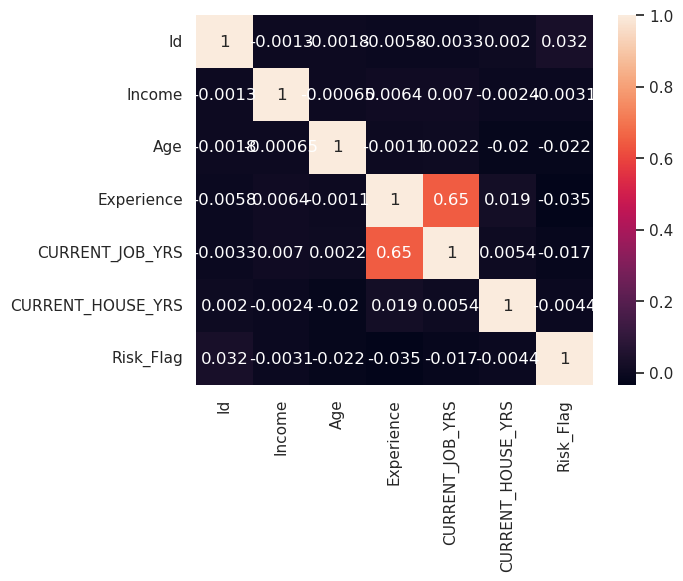

In [12]:
sns.heatmap(df.corr(), annot=True);

### Checking for Outliers

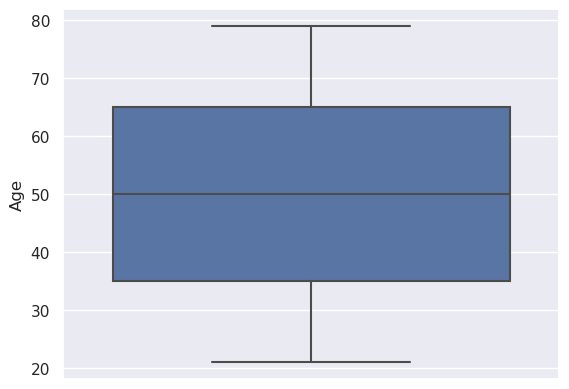

In [13]:
sns.boxplot(y = 'Age', data = df);

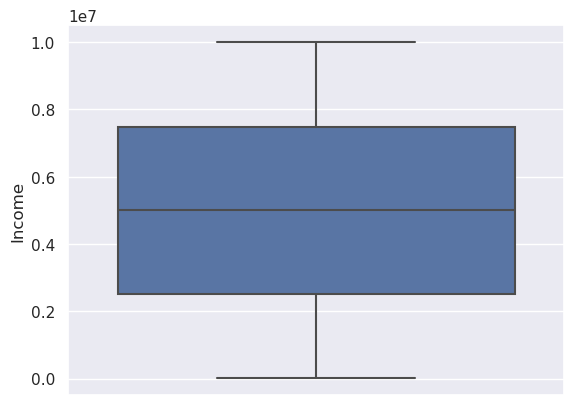

In [14]:
sns.boxplot(y = 'Income', data = df);

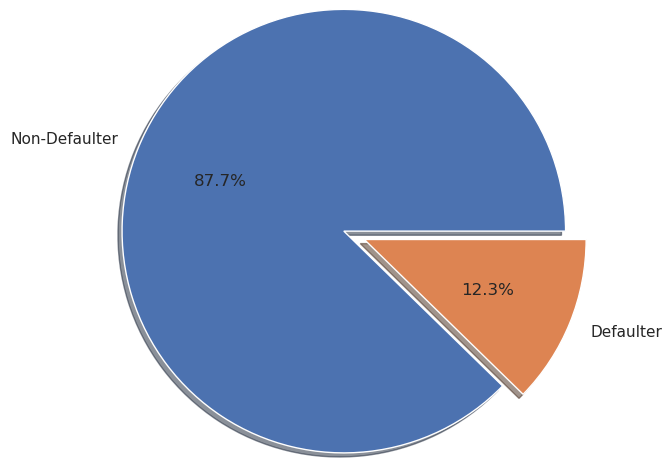

In [15]:
r = df.groupby('Risk_Flag')['Risk_Flag'].count()
plt.pie(r, explode=[0.05, 0.1], labels=['Non-Defaulter', 'Defaulter'], radius=1.5, autopct='%1.1f%%',  shadow=True);

In [16]:
print(len(df.Profession.unique()))
print(len(df.STATE.unique()))
print(len(df.CITY.unique()))

51
29
317


### Summary on Data Visualization
- Class 0 represents 88.00% of the dataset, while class 1 only 12.00%. The classes are heavily skewed we need to solve this issue
- There are no outliers in datasets. But we need to scale Age and Income
- Strong correlation between Experience and CURRENT_JOB_YRS May drop one column during feature selection process or use Principal Component Analysis (PCA)
- Married/Single House_Ownership Car_Ownership can be binarised or one-hot encoded
- We can find the relationship between target variable and categorical variable using Chi-square test

### Feature Engineering

Helping function for hypothesis testing

In [17]:
def chi_square_test(data):
    stat, p, dof, expected = chi2_contingency(data)
    alpha = 0.05
    print("p value is " + str(p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (H0 holds true)')

### Chi Square Test

In [18]:
car_ownership_risk_flag = pd.crosstab(df["Car_Ownership"], df["Risk_Flag"])
car_ownership_risk_flag

Risk_Flag,0,1
Car_Ownership,,
no,153439,22561
yes,67565,8435


In [19]:
chi_square_test(car_ownership_risk_flag)

p value is 1.7350853850183746e-33
Dependent (reject H0)


In [20]:
marital_status_risk_flag = pd.crosstab(df["Married/Single"], df["Risk_Flag"])
marital_status_risk_flag

Risk_Flag,0,1
Married/Single,,
married,23092,2636
single,197912,28360


In [21]:
chi_square_test(marital_status_risk_flag)

p value is 3.773053705715196e-26
Dependent (reject H0)


In [22]:
house_ownership_risk_flag = pd.crosstab(df["House_Ownership"], df["Risk_Flag"])
house_ownership_risk_flag

Risk_Flag,0,1
House_Ownership,,
norent_noown,6469,715
owned,11758,1160
rented,202777,29121


In [23]:
chi_square_test(house_ownership_risk_flag)

p value is 1.8381930028370595e-40
Dependent (reject H0)


### Performing Principal Component Analysis on CURRENT_JOB_YRS and Experience

In [24]:
features = ["CURRENT_JOB_YRS","Experience"]

df_for_pca = df[features]
scaled_df_for_pca = (df_for_pca - df_for_pca.mean(axis=0))/df_for_pca.std()
scaled_df_for_pca

,CURRENT_JOB_YRS,Experience
0,-0.914129,-1.180230
1,0.731035,-0.014067
2,-0.639935,-1.013635
3,-1.188323,-1.346825
4,-0.914129,0.152528
...,...,...
251995,-0.091547,0.485718
251996,-0.091547,-0.014067
251997,0.182647,-0.513851
251998,-1.736711,-1.680014


In [25]:
pca = PCA()
df_pca = pca.fit_transform(scaled_df_for_pca)
component_names = [f"PC{i+1}" for i in range(df_pca.shape[1])]
df_pca = pd.DataFrame(df_pca, columns=component_names)

df_pca.head()

,PC1,PC2
0,-1.480935,-0.188162
1,0.506973,-0.526866
2,-1.169251,-0.264246
3,-1.792620,-0.112078
4,-0.538533,0.754240


In [26]:
df1 = pd.concat([df,df_pca],axis=1)
df1.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,PC1,PC2
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,-1.480935,-0.188162
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,0.506973,-0.526866
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,-1.169251,-0.264246
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,-1.792620,-0.112078
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,-0.538533,0.754240


Label encoding for categorical variables

In [27]:
features = ['Married/Single','Car_Ownership','Profession','CITY','STATE']
label_encoder = LabelEncoder()

for col in features:
    df1[col] = label_encoder.fit_transform(df1[col])

In [28]:
df2 = pd.get_dummies(df1, columns = ["House_Ownership"])
df2.drop(["Id"],axis=1,inplace=True)

In [29]:
X = df2.drop(['Risk_Flag'],axis=1)
y = df2.Risk_Flag
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [30]:
sm = SMOTE(random_state = 500)
X_res, y_res = sm.fit_resample(X_train, y_train)

Now the data is ready for implementation of Machine Learning model!!<br>
Since the target variable is either 0 or 1, So we will use ml models which is suitable for binary classification

### Machine learning model for Binary classification 

### Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 500000)
model.fit(X_res, y_res)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
accuracy

0.8774867724867725

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66338
           1       0.00      0.00      0.00      9262

    accuracy                           0.88     75600
   macro avg       0.44      0.50      0.47     75600
weighted avg       0.77      0.88      0.82     75600



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
model.fit(X_res, y_res)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
accuracy

0.8600529100529101

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92     66338
           1       0.45      0.60      0.51      9262

    accuracy                           0.86     75600
   macro avg       0.69      0.75      0.72     75600
weighted avg       0.88      0.86      0.87     75600



### Random Forest Classification

In [35]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(criterion='gini', bootstrap=True, random_state=420)
model.fit(X_res, y_res)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
accuracy

0.8830026455026455

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93     66338
           1       0.51      0.81      0.63      9262

    accuracy                           0.88     75600
   macro avg       0.74      0.85      0.78     75600
weighted avg       0.91      0.88      0.89     75600



### Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion="entropy",random_state=420)
model.fit(X_res, y_res)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
accuracy

0.8658201058201058

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92     66338
           1       0.47      0.85      0.61      9262

    accuracy                           0.87     75600
   macro avg       0.73      0.86      0.76     75600
weighted avg       0.92      0.87      0.88     75600



### XGBoost

In [39]:
from xgboost import XGBClassifier

xg_model = XGBClassifier(learning_rate=0.1,n_estimators=1000,use_label_encoder=False,random_state=420)
xg_model.fit(X_res, y_res)
y_pred = xg_model.predict(X_test)
accuracy = xg_model.score(X_test, y_test)
accuracy

0.8908862433862433

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94     66338
           1       0.54      0.78      0.64      9262

    accuracy                           0.89     75600
   macro avg       0.75      0.84      0.79     75600
weighted avg       0.91      0.89      0.90     75600



### AdaBoost Classifier

In [41]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(random_state=15000)
model.fit(X_res, y_res)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
accuracy

0.5624206349206349

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.57      0.70     66338
           1       0.14      0.52      0.23      9262

    accuracy                           0.56     75600
   macro avg       0.52      0.54      0.46     75600
weighted avg       0.80      0.56      0.64     75600



### Passive Aggressive Classifier

In [43]:
from sklearn.linear_model import PassiveAggressiveClassifier

model = PassiveAggressiveClassifier(random_state=14500)
model.fit(X_res, y_res)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
accuracy

0.8142328042328042

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     66338
           1       0.13      0.09      0.11      9262

    accuracy                           0.81     75600
   macro avg       0.50      0.50      0.50     75600
weighted avg       0.79      0.81      0.80     75600



In [45]:
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(random_state=14500)
model.fit(X_res, y_res)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
accuracy

0.8773015873015872

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93     66338
           1       0.50      0.82      0.62      9262

    accuracy                           0.88     75600
   macro avg       0.74      0.85      0.77     75600
weighted avg       0.91      0.88      0.89     75600



### Gradient Boosting

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_res, y_res)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
accuracy

0.5946428571428571

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.60      0.72     66338
           1       0.17      0.59      0.26      9262

    accuracy                           0.59     75600
   macro avg       0.54      0.59      0.49     75600
weighted avg       0.82      0.59      0.66     75600



### Extra Tree

In [49]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(criterion="entropy",random_state=15000)
model.fit(X_res, y_res)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
accuracy

0.8806216931216931

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93     66338
           1       0.51      0.81      0.62      9262

    accuracy                           0.88     75600
   macro avg       0.74      0.85      0.78     75600
weighted avg       0.91      0.88      0.89     75600



### Conclusion
XGBoost is the best suitable model for our dataset with accuracy 89%, Alternatively Random Forest and Extra Tree Classifier can also consider, since they gives accuracy of 88%.

# Using XGboost to get prediction

In [51]:
test=pd.read_csv('../input/loan-prediction-based-on-customer-behavior/Test Data.csv')
features = ["CURRENT_JOB_YRS","Experience"]

df_for_pca = test[features]
scaled_df_for_pca = (df_for_pca - df_for_pca.mean(axis=0))/df_for_pca.std()
scaled_df_for_pca

pca = PCA()
df_pca = pca.fit_transform(scaled_df_for_pca)
component_names = [f"PC{i+1}" for i in range(df_pca.shape[1])]
df_pca = pd.DataFrame(df_pca, columns=component_names)

df_pca.head()


df1 = pd.concat([test,df_pca],axis=1)
df1.head()

features = ['Married/Single','Car_Ownership','Profession','CITY','STATE']

for col in features:
    df1[col] = label_encoder.fit_transform(df1[col])



df2 = pd.get_dummies(df1, columns = ["House_Ownership"])
df2.drop(["ID"],axis=1,inplace=True)

X=df2
y=xg_model.predict(X)
y=pd.Series(y)
prediction=pd.concat([test['ID'],y],axis=1).set_index('ID')
prediction

,0
ID,
1,0
2,1
3,0
4,1
5,0
...,...
27996,0
27997,0
27998,0


In [52]:
print("Percentage of potentially risky customers in the test data set:",round(np.mean(y),2)*100,'%')

Percentage of potentially risky customers in the test data set: 41.0 %
